# Keras

In [1]:
from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import Adam
from keras.losses import categorical_crossentropy


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [78]:
import pandas as pd
from PIL import Image
import PIL.ImageOps

In [3]:

data = pd.read_csv("mnist_train_small.csv")

In [4]:
X = data.values[:,2:]

In [5]:
y = data.values[:,1]

In [6]:
ohe = OneHotEncoder(categories="auto")

In [53]:
y_hot = ohe.fit_transform(y.reshape(-1,1)).todense()
y_hot[0]

matrix([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [89]:
layer_1 = Dense(28, activation="relu", input_shape=(784,))
layer_2 = Dense(21, activation="relu")
layer_3 = Dense(14, activation="relu")
layer_4 = Dense(10, activation="softmax")

In [90]:
model = Sequential()
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 28)                21980     
_________________________________________________________________
dense_10 (Dense)             (None, 21)                609       
_________________________________________________________________
dense_11 (Dense)             (None, 14)                308       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                150       
Total params: 23,047
Trainable params: 23,047
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [92]:
model.fit(X_train, y_train, epochs=50, batch_size=200)

Epoch 1/50
5360/5360 [==============================] - 4s 752us/step - loss: 11.2392 - acc: 0.2172
Epoch 2/50
5360/5360 [==============================] - 1s 103us/step - loss: 7.2218 - acc: 0.3787
Epoch 3/50
5360/5360 [==============================] - 0s 63us/step - loss: 3.6049 - acc: 0.4084
Epoch 4/50
5360/5360 [==============================] - 0s 38us/step - loss: 1.9365 - acc: 0.4507
Epoch 5/50
5360/5360 [==============================] - 0s 40us/step - loss: 1.4361 - acc: 0.5670
Epoch 6/50
5360/5360 [==============================] - 0s 38us/step - loss: 1.1813 - acc: 0.6455
Epoch 7/50
5360/5360 [==============================] - 0s 36us/step - loss: 1.0065 - acc: 0.7034
Epoch 8/50
5360/5360 [==============================] - 0s 38us/step - loss: 0.8894 - acc: 0.7287
Epoch 9/50
5360/5360 [==============================] - 0s 52us/step - loss: 0.8148 - acc: 0.7513
Epoch 10/50
5360/5360 [==============================] - 0s 41us/step - loss: 0.7395 - acc: 0.7701
Epoch 11/50
5360

In [93]:
model.evaluate(X_test, y_test)

2640/2640 [==============================] - 0s 82us/step


[0.8519411658501309, 0.8731060606060606]

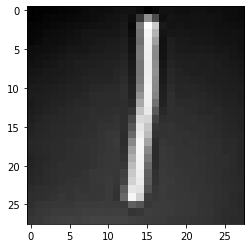

In [94]:
from PIL import Image
import PIL.ImageOps
im = Image.open("nums/one.jpeg")
im = im.resize((28, 28), Image.ANTIALIAS)
im = PIL.ImageOps.invert(im)
np_im = np.array(im.convert('L'))
plt.imshow(np_im,cmap="gray")

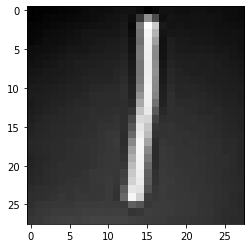

In [95]:
plt.imshow(im.convert("L"),cmap="gray")

In [96]:
np_im = np_im.flatten()
np_im.shape

(784,)

In [97]:
model.evaluate(np.array([np_im]), np.array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

1/1 [==============================] - 0s 789us/step


[16.11809539794922, 0.0]

In [98]:
model.predict(np.array([np_im]), np.array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), steps=1)

ValueError: If steps is set, the `batch_size` must be None.

In [102]:
(model.predict(np_im.flatten().reshape(1,-1)))

array([[4.1690567e-09, 1.6957789e-09, 9.2784881e-05, 4.1810476e-06,
        5.7986373e-24, 2.7205232e-07, 5.0365972e-13, 9.6810915e-10,
        9.9990273e-01, 8.5772216e-09]], dtype=float32)

In [15]:
ohe.categories_

[array([0, 4, 5])]

In [18]:
ohe.transform(data.reshape(-1,1)).todense()

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])